In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import norm
from numpy.random import randn
from numpy import random as rn
import scipy.stats as si
from matplotlib import pyplot as plt
from IPython.display import Image
%matplotlib inline

In [ ]:
def RAND():
 d = rn.uniform(0, 1, 1)[0]
 return (d)

In [ ]:
def NORMINV(x,mu,sigma):
 d = si.norm.ppf(x, loc = mu, scale = sigma)
 return (d)

In [ ]:
S0 = 21500

In [ ]:
M = 30
S = np.ones(M)
S

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
step = np.arange(0,31)
step

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

Data Pre-Processing

In [ ]:
df = pd.DataFrame(step, columns=['Step i'])
df.head()

,Step i
0,0
1,1
2,2
3,3
4,4


In [ ]:
df['Uniform ui RAND(⋅)']=0.0000
for i in range(1,len(df['Step i'])):
 df['Uniform ui RAND(⋅)'][i]=RAND()
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Step i,Uniform ui RAND(⋅)
0,0,0.000000
1,1,0.330396
2,2,0.229818
3,3,0.019357
4,4,0.022750


In [ ]:
df['Normal ui NORMINV(ui,0.0,0.00965817443)']=0.0000
for i in range(1,len(df['Step i'])):
 df['Normal ui NORMINV(ui,0.0,0.00965817443)'][i] = NORMINV(df['Uniform ui RAND(⋅)'][i],0.0,0.00965817443)
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Step i,Uniform ui RAND(⋅),"Normal ui NORMINV(ui,0.0,0.00965817443)"
0,0,0.000000,0.000000
1,1,0.330396,-0.004238
2,2,0.229818,-0.007142
3,3,0.019357,-0.019965
4,4,0.022750,-0.019316


Predicting Bitcoin Price

In [ ]:
df['Price St+i']=0.000
df['Price St+i'][0]=S0
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Step i,Uniform ui RAND(⋅),"Normal ui NORMINV(ui,0.0,0.00965817443)",Price St+i
0,0,0.000000,0.000000,21500.0
1,1,0.330396,-0.004238,0.0
2,2,0.229818,-0.007142,0.0
3,3,0.019357,-0.019965,0.0
4,4,0.022750,-0.019316,0.0


In [ ]:
for i in range(0,30):
 df['Price St+i'][i+1] = df['Price St+i'][i]+ df['Price St+i'][i]*df['Normal ui NORMINV(ui,0.0,0.00965817443)'][i+1]
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Step i,Uniform ui RAND(⋅),"Normal ui NORMINV(ui,0.0,0.00965817443)",Price St+i
0,0,0.000000,0.000000,21500.000000
1,1,0.330396,-0.004238,21408.878800
2,2,0.229818,-0.007142,21255.983131
3,3,0.019357,-0.019965,20831.598290
4,4,0.022750,-0.019316,20429.208240


In [ ]:
df['Price Increment']=0.000
for i in range(1,30):
 df['Price Increment'][i] = df['Price St+i'][i-1] * df['Normal ui NORMINV(ui,0.0,0.00965817443)'][i]
df.drop(['Price St+i'],axis=1,inplace=True)
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Step i,Uniform ui RAND(⋅),"Normal ui NORMINV(ui,0.0,0.00965817443)",Price Increment
0,0,0.000000,0.000000,0.000000
1,1,0.330396,-0.004238,-91.121200
2,2,0.229818,-0.007142,-152.895669
3,3,0.019357,-0.019965,-424.384841
4,4,0.022750,-0.019316,-402.390050


In [ ]:
df['Price St+i'] = 0.000
df['Price St+i'][0] = S0
for i in range(0,30):
 df['Price St+i'][i+1] = df['Price St+i'][i]+ df['Price Increment'][i+1]
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Step i,Uniform ui RAND(⋅),"Normal ui NORMINV(ui,0.0,0.00965817443)",Price Increment,Price St+i
0,0,0.000000,0.000000,0.000000,21500.000000
1,1,0.330396,-0.004238,-91.121200,21408.878800
2,2,0.229818,-0.007142,-152.895669,21255.983131
3,3,0.019357,-0.019965,-424.384841,20831.598290
4,4,0.022750,-0.019316,-402.390050,20429.208240


Simulation

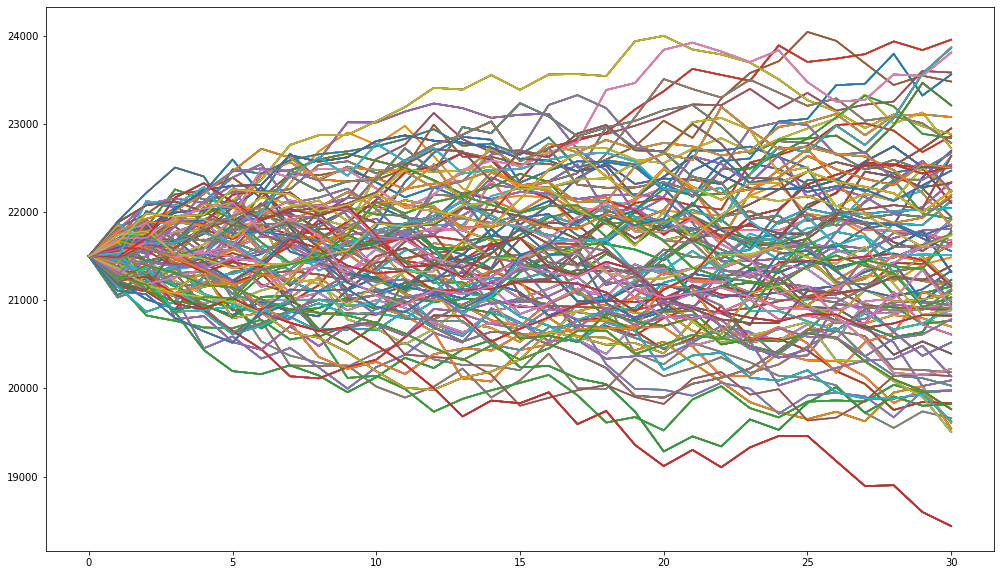

In [ ]:
S0 = 21500
mu = 0
sigma = 0.00965817443
M = 100
N = 30
T = 30
h = T/N
Z = rn.randn(M,N)
S = S0*np.ones((M,N+1))
for i in range(0,N):
 S[:,i+1] = S[:,i] + S[:,i]*( mu*h + sigma*np.sqrt(h)*Z[:,i] )
plt.figure(figsize=(17,10))
a = [ rn.randint(0,M) for j in range(1,1000)]
for runer in a:
 plt.plot(np.arange(0,T+h,h),S[runer])